# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ahmad Rizki
- **Email:** amrizjr@gmail.com
- **ID Dicoding:** xmriz

### Deskripsi
Pada proyek ini, saya akan menganalisis data penjualan e-commerce (Olist Store) di Brazil. Data ini berisi tentang data penjualan e-commerce di Brazil. Data ini terdiri dari beberapa tabel, yaitu:
- `customers_dataset.csv` : berisi data pelanggan
- `geolocation_dataset.csv` : berisi data geolokasi pelanggan
- `order_items_dataset.csv` : berisi data barang yang dibeli
- `order_payments_dataset.csv` : berisi data pembayaran
- `order_reviews_dataset.csv` : berisi data review pelanggan
- `orders_dataset.csv` : berisi data pesanan
- `products_dataset.csv` : berisi data produk
- `sellers_dataset.csv` : berisi data penjual
- `product_category_name_translation.csv` : berisi data kategori produk

Dengan hubungan antar tabel sebagai berikut:
<p align="center">
  <img src="./assets/data_schema.png" width="700">
</p>



## Menentukan Pertanyaan Bisnis

Analisis ini bertujuan untuk menjawab beberapa pertanyaan bisnis, yaitu:
1. Bagaimana demografi pengguna e-commerce (customers, sellers) yang dimiliki?
2. Bagaimana Performa Penjualan dan Revenue Perusahaan dalam rentang waktu yang ditentukan?
3. Kategori Produk Apa yang Paling Banyak dan Paling Sedikit di Jual?
4. Kategori Produk Apa yang Paling Banyak dan Paling Sedikit di Beli?
5. Bagaimana kesan pelanggan terhadap orderan yang mereka lakukan?
6. Kapan terakhir pelanggan melakukan transaksi? (RFM Analysis, Recency)
7. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir? (RFM Analysis, Frequency)
8. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir? (RFM Analysis, Monetary)

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.image as mpimg

## **Data Wrangling**

### **Data Loading**

#### Tabel Customers

In [2]:
customers_df = pd.read_csv('./E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Tabel Sellers

In [3]:
sellers_df = pd.read_csv('./E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Tabel Geolocation

In [4]:
geolocation_df = pd.read_csv('./E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Tabel Orders

In [5]:
orders_df = pd.read_csv('./E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Tabel Order Items

In [6]:
order_items_df = pd.read_csv('./E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Tabel Order Payments

In [7]:
order_payments_df = pd.read_csv('./E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### Tabel Order Reviews

In [8]:
order_reviews_df = pd.read_csv('./E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### Tabel Products

In [9]:
products_df = pd.read_csv('./E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Tabel Product Category Name Translation

In [10]:
product_category_name_translation_df = pd.read_csv('./E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### **Data Assessing**

#### **Data Customers**

**Data Info**

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Missing Values**

In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Duplicate Values**

In [13]:
print("Jumlah duplikasi data pada customer_df: ", customers_df.duplicated().sum())

Jumlah duplikasi data pada customer_df:  0


**Data Describe**

In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### **Data Sellers**

**Data Info**

In [15]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Missing Values**

In [16]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**Duplicate Values**

In [17]:
print("Jumlah duplikasi data pada sellers_df: ", sellers_df.duplicated().sum())

Jumlah duplikasi data pada sellers_df:  0


**Data Describe**

In [18]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### **Data Geolocation**

**Data Info**

In [19]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**Missing Values**

In [20]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**Duplicate Values**

In [21]:
print("Jumlah duplikasi data pada geolocation_df: ", geolocation_df.duplicated().sum())

Jumlah duplikasi data pada geolocation_df:  261831


**Data Describe**

In [22]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### **Data Orders**

**Data Info**

In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Missing Values**

In [24]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Duplicate Values**

In [25]:
print("Jumlah duplikasi data pada orders_df: ", orders_df.duplicated().sum())

Jumlah duplikasi data pada orders_df:  0


**Data Describe**

In [26]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### **Data Order Items**

**Data Info**

In [27]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Missing Values**

In [28]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Duplicate Values**

In [29]:
print("Jumlah duplikasi data pada order_items_df: ", order_items_df.duplicated().sum())

Jumlah duplikasi data pada order_items_df:  0


**Data Describe**

In [30]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### **Data Order Payments**

**Data Info**

In [31]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Missing Values**

In [32]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Duplicate Values**

In [33]:
print("Jumlah duplikasi data pada order_payments_df: ", order_payments_df.duplicated().sum())

Jumlah duplikasi data pada order_payments_df:  0


**Data Describe**

In [34]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### **Data Order Reviews**

**Data Info**

In [35]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Missing Values**

In [36]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Duplicate Values**

In [37]:
print("Jumlah duplikasi data pada order_reviews_df: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi data pada order_reviews_df:  0


**Data Describe**

In [38]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### **Data Products**

**Data Info**

In [39]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Missing Values**

In [40]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Duplicate Values**

In [41]:
print("Jumlah duplikasi data pada products_df: ", products_df.duplicated().sum())

Jumlah duplikasi data pada products_df:  0


**Data Describe**`

In [42]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### **Data Product Category Name Translation**

**Data Info**

In [43]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Missing Values**

In [44]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

**Duplicate Values**

In [45]:
print("Jumlah duplikasi data pada product_category_name_translation_df: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi data pada product_category_name_translation_df:  0


**Data Describe**

In [46]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### **Hasil Data Assessing**

|                                      | Tipe Data                                                                                                                                                                           | Missing Value                                                                                                                                                                                                                                                                | Duplicate Data                | Inaccurate value |
| ------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------- | ---------------- |
| customers_df                          | -                                                                                                                                                                                   | -                                                                                                                                                                                                                                                                            | -                             | -                |
| sellers_df                            | -                                                                                                                                                                                   | -                                                                                                                                                                                                                                                                            | -                             | -                |
| geolocation_df                       | -                                                                                                                                                                                   | -                                                                                                                                                                                                                                                                            | Terdapat 261831 data duplikat | -                |
| orders_df                             | Terdapat kesalahan tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date | Terdapat missing value sebanyak 160 pada kolom order_approved_at, 1783 pada order_delivered_carrier_date, dan 2965 pada order_delivered_customer_date                                                                                                                        | -                             | -                |
| order_items_df                       | Terdapat kesalahan tipe data pada kolom shiping_limit_date                                                                                                                          | -                                                                                                                                                                                                                                                                            | -                             | -                |
| order_payments_df                    | -                                                                                                                                                                                   | -                                                                                                                                                                                                                                                                            | -                             | -                |
| order_reviews_df                     | Terdapat kesalahan tipe data pada kolom review_creation_date                                                                                                                        | Terdapat missing value sebanyak 87656 pada kolom review_comment_title dan 58247 pada review_comment_message                                                                                                                                                                  | -                             | -                |
| products_df                           | -                                                                                                                                                                                   | Terdapat missing value sebanyak 610 pada kolom product_category_name, 610 pada product_name_lenght, 610 pada product_description_lenght, 2 pada product_photos_qty, 2 pada product_weight_g, 2 pada product_length_cm, 2 pada product_height_cm, dan 2 pada product_width_cm | -                             | -                |
| product_category_name_translation_df | -                                                                                                                                                                                   | -                                                                                                                                                                                                                                                                            | -                             | -                |

### **Data Cleaning**

#### **Data Transformation**

#### Data Orders

Pada data orders, kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` memiliki tipe data `object` yang seharusnya bertipe `datetime`. Oleh karena itu, kita akan mengubah tipe data kolom tersebut menjadi `datetime`.

In [47]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Data Orders Items

Pada data order items, kolom `shipping_limit_date` memiliki tipe data `object` yang seharusnya bertipe `datetime`. Oleh karena itu, kita akan mengubah tipe data kolom tersebut menjadi `datetime`.

In [48]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Data Orders Reviews

Pada data order reviews, kolom `review_creation_date` memiliki tipe data `object` yang seharusnya bertipe `datetime`. Oleh karena itu, kita akan mengubah tipe data kolom tersebut menjadi `datetime`.

In [49]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])

#### **Missing Values Handling**

#### Data Orders

Pada data orders, terdapat missing value pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`. Kita akan menghapus baris yang memiliki missing value pada kolom tersebut.

In [50]:
orders_df.dropna(inplace=True)

orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Data Order Reviews

Pada data order reviews, terdapat missing value pada kolom `review_comment_title` dan `review_comment_message`. Kita akan mengisi missing value tersebut dengan string "No Comment".

In [51]:
order_reviews_df['review_comment_title'].fillna('No Comment', inplace=True)
order_reviews_df['review_comment_message'].fillna('No Comment', inplace=True)

order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Data Products

Pada data products, terdapat missing value pada kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm`. Kita akan menghapus baris yang memiliki missing value pada kolom tersebut.

In [52]:
order_items_df.dropna(inplace=True)

order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### **Duplicate Data Handling**

#### Data Geolocation

Pada data geolocation, terdapat 261831 data duplikat. Data duplikat ini akan dihapus.

In [53]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi data pada geolocation_df: ", geolocation_df.duplicated().sum())

Jumlah duplikasi data pada geolocation_df:  0


## **Exploratory Data Analysis (EDA)**

### Explore `customers_df`

In [54]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
53595,81147d80da983d1e3dfdb790f6060efc,4250e66a408a79f23ac24172a28e60da,86360,bandeirantes,PR
77804,3761fb97ef1682ad84904bc2fb970b7d,5282994a5378052fe1b82719ff09be75,23870,vila muriqui,RJ
7987,e7fdf001dc15351131c29af7d65ba701,69f2934ad8b50cc05587a94cc7d68fc9,85601,francisco beltrao,PR
3882,c816e4e3436cb415372f7d43d2256b1d,490affd54728ccc9f08528e60f7f5ffe,2054,sao paulo,SP
2100,1722422d4c5041e9c2157a76461fc2a5,8e83592cfac940307a4f9b8ec245157d,4334,sao paulo,SP


In [55]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Demografi customer yang dimiliki oleh Olist Store.

In [56]:
customers_df.groupby(by=['customer_state', 'customer_city']).agg({
    'customer_unique_id': 'count'
}).sort_values(by='customer_unique_id', ascending=False)

customer_unique_id
customer_state customer_city                     
SP             sao paulo                    15540
RJ             rio de janeiro                6882
MG             belo horizonte                2773
DF             brasilia                      2131
PR             curitiba                      1521
...                                           ...
RS             cerro grande                     1
               cerrito                          1
               caseiros                         1
MG             ipuiuna                          1
AC             brasileia                        1

[4310 rows x 1 columns]

### Explore `sellers_df`

In [57]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1391,bf3c6d2a28b2b5501e6c15448982dcc9,4180,sao paulo,SP
2460,8ae520247981aa06bc94abddf5f46d34,88370,navegantes,SC
656,0a198e95d32b1be2da9424c962a6ebfa,32260,contagem,MG
1764,f7315bb81aea4ddca2d39e249a801c98,7082,guarulhos,SP
2102,cb5ff1b9715e99589f3e0c7a6afab9e3,87060,maringa,PR


In [58]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Demografi seller yang dimiliki oleh Olist Store.

In [59]:
sellers_df.groupby(by=['seller_state', 'seller_city']).agg({
    'seller_id': 'count'
}).sort_values(by='seller_id', ascending=False)

seller_id
seller_state seller_city                      
SP           sao paulo                     694
PR           curitiba                      124
RJ           rio de janeiro                 93
MG           belo horizonte                 66
SP           ribeirao preto                 52
...                                        ...
RJ           tres rios                       1
             saquarema                       1
             sao pedro da aldeia             1
             santo antonio de padua          1
SC           camboriu                        1

[636 rows x 1 columns]

### Explore `orders_df`

In [60]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
98067,8f448432fec521b889d6b87b716cc01d,0aa91d0cd690f66d4d4e1c9cc82652c7,delivered,2017-10-05 20:23:22,2017-10-07 02:44:54,2017-10-09 15:48:09,2017-10-16 22:23:08,2017-10-31
52540,eacbe7948aadfac0292211f2f352fdeb,d7f3c5688f1d04e1af261ce65b5540c6,delivered,2017-10-29 17:10:13,2017-10-29 17:24:56,2017-10-30 20:12:15,2017-11-11 18:29:43,2017-11-28
70624,baa5545eb30192ce3b92bcf1b8e19437,ff5a01862583adcd0f1715bb88931be2,delivered,2017-03-06 20:43:07,2017-03-08 03:15:10,2017-03-08 08:03:52,2017-03-14 14:34:14,2017-03-27
38941,ff8bd473e4aaf9218bdcffd1a5b92a77,5eb5071a0658db5ffec8043466df8141,delivered,2017-05-21 22:16:00,2017-05-21 22:30:14,2017-05-22 12:41:51,2017-05-29 09:59:58,2017-06-13
14105,38187389c2f33340aa62db07a30a5c89,59d79f98f34e1e8efd46e293382a8de1,delivered,2017-09-27 20:42:00,2017-09-27 20:49:27,2017-09-29 12:51:27,2017-10-05 18:37:40,2017-10-31


Statistik penjualan yang dilakukan oleh Olist Store.

In [61]:
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
delivery_time = delivery_time.dt.days
orders_df['delivery_time'] = delivery_time
orders_df['delivery_time'] = orders_df['delivery_time'].astype(int)

In [62]:
orders_df.describe(include='all')

C:\Users\acer\AppData\Local\Temp\ipykernel_8260\2443296560.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
C:\Users\acer\AppData\Local\Temp\ipykernel_8260\2443296560.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include='all')
C:\Users\acer\AppData\Local\Temp\ipykernel_8260\2443296560.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavi

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,95939,88272,80100,95649,445,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00,NaN
freq,1,1,96455,3,9,47,3,507,NaN
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.093582
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.551576
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


### Explore `products_df`, `order_items_df`, dan `product_category_name_translation_df`

Produk paling murah dan paling mahal yang dijual oleh Olist Store.

In [63]:
products_orderItems_df = pd.merge(order_items_df, products_df, on='product_id', how='left')
products_orderItems_category_df = pd.merge(products_orderItems_df, product_category_name_translation_df, on='product_category_name', how='left')
products_orderItems_category_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
94616,d6935883de7964fcdc68585bac9166a7,1,f15982438cbe439923dbc01e8ee1b6e8,73a63f72308aa20a46f4b1632018f196,2017-07-26 15:04:09,329.0,16.05,ferramentas_jardim,50.0,718.0,1.0,9200.0,33.0,7.0,33.0,garden_tools
65451,9592e993fa9bd76e414ffecdceaa13c9,1,19396b91a7c64a48aff0f42cd35444a5,901b460cdce0c64e471230d7f2f9f3a3,2018-03-20 08:31:12,259.0,16.69,moveis_quarto,39.0,243.0,2.0,100.0,16.0,5.0,14.0,furniture_bedroom
37669,55788c74967dbef64cfde7d1db11e49d,1,6f3b5b605d91b7439c5e3f5a8dffeea7,7d13fca15225358621be4086e1eb0964,2018-05-17 08:58:17,145.0,12.24,relogios_presentes,35.0,640.0,1.0,335.0,17.0,11.0,16.0,watches_gifts
70291,a05cabeed82a5a2e8078c7e6ed14a03a,1,32b168004f17c743f16bcf5bab0de982,562f8cfc51f265411f487d07e9c40e7f,2017-12-13 22:36:28,49.9,14.10,cool_stuff,23.0,789.0,1.0,5250.0,40.0,20.0,40.0,cool_stuff
26731,3ccadf098357a20c809d57a50c3d47ae,1,634256dbcd184b3757ffd7632c9fe52a,42b729f859728f5079499127a9c2ef37,2018-06-06 03:31:14,24.9,7.39,beleza_saude,49.0,295.0,1.0,150.0,16.0,5.0,17.0,health_beauty


In [64]:
products_orderItems_category_df.describe(include='all')

C:\Users\acer\AppData\Local\Temp\ipykernel_8260\3040128467.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  products_orderItems_category_df.describe(include='all')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,111047,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000,111023
unique,98666,NaN,32951,3095,93318,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,21,NaN,527,2033,21,NaN,NaN,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11115
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN


In [65]:
products_orderItems_category_df.sort_values(by='price', ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction


Statistik penjualan produk yang dijual oleh Olist Store (Top 10 Kategori dengan Penjualan Terbanyak).

In [66]:
products_orderItems_category_df.groupby(by='product_category_name_english').agg({
    'product_id': 'count',
    'price': ['min', 'max', 'mean']
}).sort_values(by=('product_id', 'count'), ascending=False).head(10)

product_id price                     
                                   count   min      max        mean
product_category_name_english                                      
bed_bath_table                     11115  6.99  1999.98   93.296327
health_beauty                       9670  1.20  3124.00  130.163531
sports_leisure                      8641  4.50  4059.00  114.344285
furniture_decor                     8334  4.90  1899.00   87.564494
computers_accessories               7827  3.90  3699.99  116.513903
housewares                          6964  3.06  6735.00   90.788148
watches_gifts                       5991  8.99  3999.90  201.135984
telephony                           4545  5.00  2428.00   71.213978
garden_tools                        4347  6.35  3930.00  111.630196
auto                                4235  3.49  2258.00  139.957523

Top 10 Kategori dengan Pendapatan Terbanyak

In [67]:
products_orderItems_category_df.groupby(by='product_category_name_english').agg({
    'price': ['sum']
}).sort_values(by=('price', 'sum'), ascending=False).head(10)

,price
,sum
product_category_name_english,
health_beauty,1258681.34
watches_gifts,1205005.68
bed_bath_table,1036988.68
sports_leisure,988048.97
computers_accessories,911954.32
furniture_decor,729762.49
cool_stuff,635290.85
housewares,632248.66


### Explore `customers_df` dan `orders_df`

Keaktifan customer dalam bertransaksi.

In [68]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
39600,5ad6bc8f1dc030d6adbb044fc6a7e394,ef3e32f1b8658891add797672f995cc5,31980,belo horizonte,MG,Active
32302,dc17fd90aa1a2ba097e0b0f428934fb4,f3fa438dbccd0fd608c2da289ed8d6be,73020,brasilia,DF,Active
17390,8a67f4176555ddc74a6e897968988a74,14b79aa03b656dbd7c3abdbecbcab862,29055,vitoria,ES,Active
44479,78a57370d161a773e20ae290539b1a5d,652bd3d0d2c691233e67d671af0ceee7,8450,sao paulo,SP,Active
6454,e2ccd88ee72187cef52de491449cd034,85a1b5804de46e89eb874a605e439db6,5416,sao paulo,SP,Active


In [69]:
customers_df.groupby(by='status').customer_id.count().reset_index().rename(columns={'customer_id': 'count'})

,status,count
0,Active,96461
1,Non Active,2980


Jumlah order berdasarkan kota (Top 10)

In [70]:
orders_customer_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')
orders_customer_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
45561,d1c90196444f5facb3a682e1a531abd7,299f38e2449cce61d9f3a2530c1d91c8,delivered,2017-02-27 15:16:24,2017-02-27 15:25:14,2017-03-02 06:57:32,2017-03-08 11:22:27,2017-03-23,8,79b9e9b310f3094c2cad708eb17508c2,13340,indaiatuba,SP,Active
70478,9845d84225d361cb655d4963c6aeaa87,c6cf18b71c8f0e99e92df766996aae66,delivered,2018-07-16 13:05:24,2018-07-16 13:15:19,2018-07-17 13:37:00,2018-07-23 17:19:38,2018-07-30,7,2030093618ba6ab6c8d9047aac996be4,35164,ipatinga,MG,Active
33173,859251cf2a5cfdc89031c995e47842e4,153bf0506c6412533e16757df9c62a5d,delivered,2018-08-16 15:21:50,2018-08-16 15:35:15,2018-08-17 10:20:00,2018-08-20 23:58:29,2018-08-28,4,9a8189578efbd707c49a4578d3406ef6,72225,brasilia,DF,Active
90949,96fbdd47df43d3aa6c7f44abdc978f8d,ccba8aa1f34a81093f829d4d778ea6d5,delivered,2017-12-08 11:52:06,2017-12-08 12:10:07,2017-12-13 13:15:45,2017-12-20 18:14:31,2018-01-08,12,6b6b792dba8731066dfcad93c56060a3,71900,brasilia,DF,Active
24264,2296fa4ebace1edacb9f91509766eb18,6982d29c7336cb81ba41937fbf3660b1,delivered,2018-07-21 19:57:05,2018-07-21 20:10:20,2018-08-06 14:27:00,2018-08-07 20:18:46,2018-08-14,17,d132b863416f85f2abb1a988ca05dd12,9111,santo andre,SP,Active


In [71]:
orders_customer_df.groupby(by='customer_city').order_id.count().reset_index().rename(columns={'order_id': 'count'}).sort_values(by='count', ascending=False).head(10).reset_index(drop=True)

,customer_city,count
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


Jumlah order berdasarkan negara bagian (Top 10)

In [72]:
orders_customer_df.groupby(by='customer_state').order_id.count().reset_index().rename(columns={'order_id': 'count'}).sort_values(by='count', ascending=False).head(10).reset_index(drop=True)

,customer_state,count
0,SP,40489
1,RJ,12351
2,MG,11352
3,RS,5342
4,PR,4923
5,SC,3547
6,BA,3256
7,DF,2080
8,ES,1995
9,GO,1957


### Explore `geolocation_df`

In [73]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
53848,3317,-23.538450,-46.558742,sao paulo,SP
929023,89223,-26.246611,-48.847954,joinville,SC
268010,12020,-23.021119,-45.554147,taubate,SP
638959,37970,-20.746801,-46.858841,pratápolis,MG
962071,94820,-29.993968,-51.086086,alvorada,RS


Untuk menyederhanakan analisis, kita akan menggunakan rata-rata latitude dan longitude untuk setiap zipcode.

In [74]:
geolocation_df = geolocation_df.groupby(by='geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
9797,39615,-16.757788,-41.497051
8216,31640,-19.802006,-43.973117
8212,31610,-19.812662,-43.954291
18037,92130,-29.956660,-51.163861
11862,58065,-7.200245,-34.857403


## **Visualization & Explanatory Analysis**

### **Bagaimana demografi pengguna e-commerce (customers, sellers) yang dimiliki?**

### Demografi Pengguna (Customers)

Jumlah Customer berdasarkan Negara Bagian

In [75]:
customer_bystate_df = customers_df.groupby(by='customer_state').size().sort_values(ascending=False).reset_index(name='total_customers')
customer_bystate_df.rename(columns={'customer_state':'state'}, inplace=True)
customer_bystate_df

,state,total_customers
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


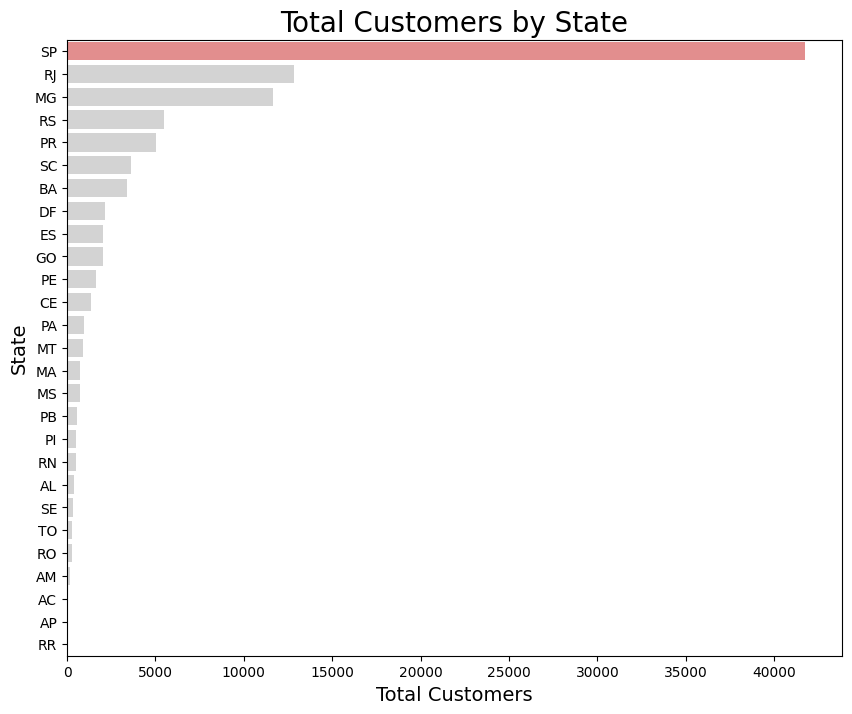

In [76]:
plt.figure(figsize=(10, 8))

# create bar plot
sns.barplot(
    x="total_customers",
    y="state",
    data=customer_bystate_df,
    hue="state",
    palette=['lightcoral'] + ['lightgrey'] * (len(customer_bystate_df) - 1),
    dodge=False
)
plt.title('Total Customers by State', fontsize=20)
plt.xlabel('Total Customers', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.legend([], frameon=False)
plt.show()

### Demografi Pengguna (Sellers)

Jumlah Seller berdasarkan Negara Bagian

In [77]:
seller_bystate_df = sellers_df.groupby(by='seller_state').size().sort_values(ascending=False).reset_index(name='total_sellers')
seller_bystate_df.rename(columns={'seller_state':'state'}, inplace=True)
seller_bystate_df

,state,total_sellers
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


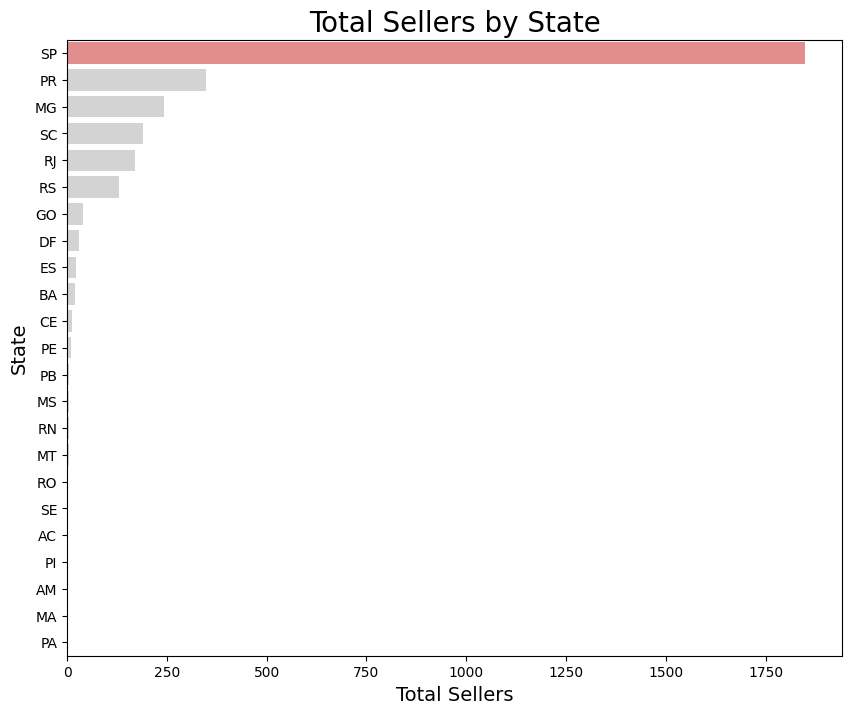

In [78]:
plt.figure(figsize=(10, 8))

# create bar plot
sns.barplot(
    x="total_sellers",
    y="state",
    data=seller_bystate_df,
    hue="state",
    palette=['lightcoral'] + ['lightgrey'] * (len(seller_bystate_df) - 1),
    dodge=False
)
plt.title('Total Sellers by State', fontsize=20)
plt.xlabel('Total Sellers', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.legend([], frameon=False)
plt.show()

### Plotting Peta Geolokasi Pengguna

In [79]:
brazil = mpimg.imread('./assets/brazil_map.png')

customer_geolocation_df = pd.merge(customers_df, geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
sellers_geolocation_df = pd.merge(sellers_df, geolocation_df, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

customer_geolocation_df = customer_geolocation_df[['customer_unique_id', 'customer_state', 'geolocation_lat', 'geolocation_lng']]
sellers_geolocation_df = sellers_geolocation_df[['seller_id', 'seller_state', 'geolocation_lat', 'geolocation_lng']]

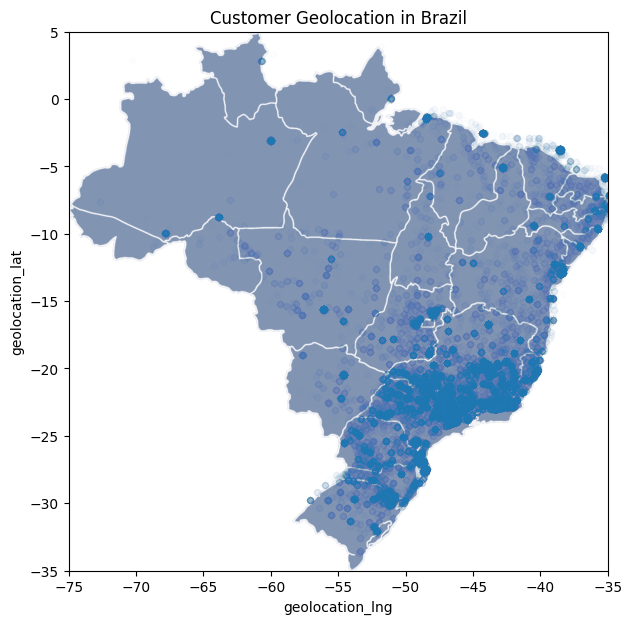

In [80]:
customer_geolocation_df.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", alpha=0.01, figsize=(10,7), colorbar=False)
plt.imshow(brazil, extent=[-75, -35, -35, 5], alpha=0.5)
plt.title('Customer Geolocation in Brazil')
plt.show()

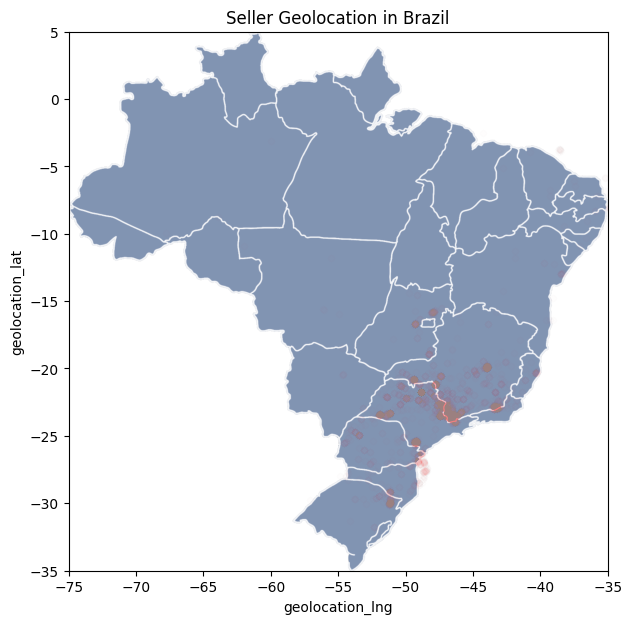

In [81]:
sellers_geolocation_df.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", alpha=0.01, figsize=(10,7), colorbar=False, c='lightcoral')
plt.imshow(brazil, extent=[-75, -35, -35, 5], alpha=0.5)
plt.title('Seller Geolocation in Brazil')
plt.show()

### **Bagaimana Performa Penjualan dan Revenue Perusahaan dalam rentang waktu yang ditentukan?**

In [82]:
order_orderItem_df = pd.merge(orders_df, order_items_df, on='order_id', how='outer')
order_orderItem_orderPayment_df = pd.merge(order_orderItem_df, order_payments_df, on='order_id', how='outer')

order_orderItem_orderPayment_df = order_orderItem_orderPayment_df[['order_id', 'order_purchase_timestamp', 'payment_value']]

date_start = datetime.datetime(2016, 1, 1)
date_end = datetime.datetime(2018, 9, 3)

# filter the data
filtered_orders_df = order_orderItem_orderPayment_df[(order_orderItem_orderPayment_df['order_purchase_timestamp'] >= date_start) & (order_orderItem_orderPayment_df['order_purchase_timestamp'] <= date_end)]


#### Jumlah Penjualan per Bulan

In [83]:
monthly_orders_df = filtered_orders_df.resample('M', on='order_purchase_timestamp').size().reset_index(name='total_orders')
monthly_orders_df.rename(columns={'order_purchase_timestamp':'month'}, inplace=True)
monthly_orders_df

,month,total_orders
0,2016-09-30,3
1,2016-10-31,336
2,2016-11-30,0
3,2016-12-31,1
4,2017-01-31,961
5,2017-02-28,1949
6,2017-03-31,3078
7,2017-04-30,2707
8,2017-05-31,4260
9,2017-06-30,3687


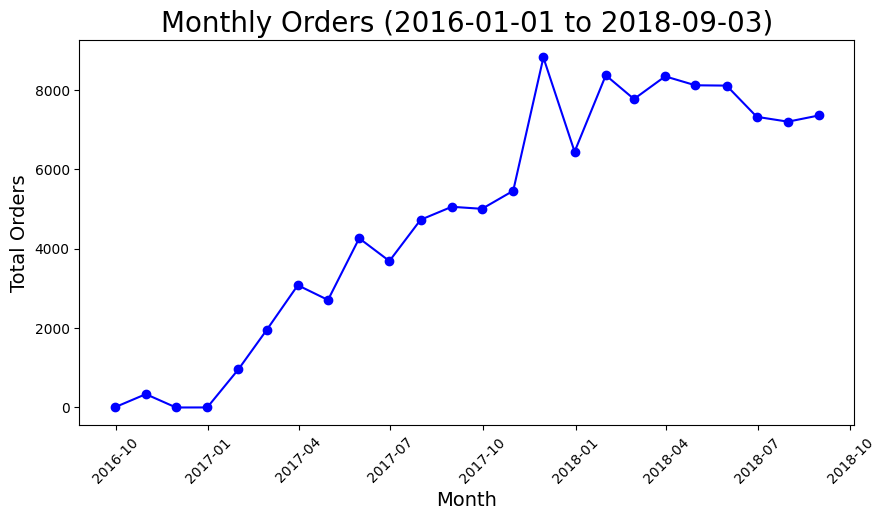

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df['month'], monthly_orders_df['total_orders'], marker='o', linestyle='-', color='b')
plt.title('Monthly Orders' + ' (' + str(date_start.date()) + ' to ' + str(date_end.date()) + ')', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)
plt.xticks(rotation=45)
plt.show()

#### Jumlah Revenue per Bulan

In [85]:
monthly_payment_df = filtered_orders_df.resample('M', on='order_purchase_timestamp')['payment_value'].sum().reset_index(name='total_payment')
monthly_payment_df.rename(columns={'order_purchase_timestamp':'month'}, inplace=True)
monthly_payment_df

,month,total_payment
0,2016-09-30,0.00
1,2016-10-31,62591.65
2,2016-11-30,0.00
3,2016-12-31,19.62
4,2017-01-31,176376.56
5,2017-02-28,323815.95
6,2017-03-31,505735.83
7,2017-04-30,456108.32
8,2017-05-31,701119.60
9,2017-06-30,585400.98


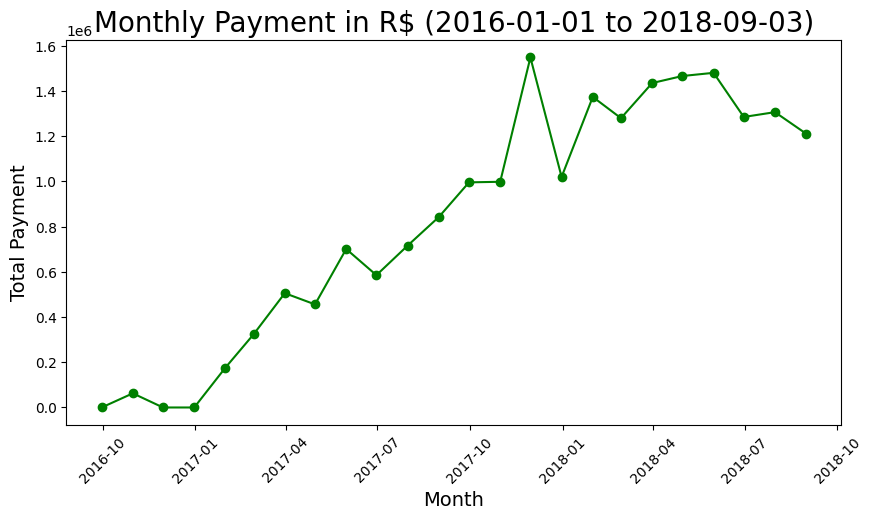

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_payment_df['month'], monthly_payment_df['total_payment'], marker='o', linestyle='-', color='g')
plt.title('Monthly Payment in R$' + ' (' + str(date_start.date()) + ' to ' + str(date_end.date()) + ')', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Payment', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### **Kategori Produk Apa yang Paling Banyak dan Paling Sedikit di Jual?**

In [87]:
product_orderItems_df = pd.merge(order_items_df, products_df, on='product_id', how='inner')
product_orderItems_category_df = pd.merge(product_orderItems_df, product_category_name_translation_df, on='product_category_name', how='inner')

product_orderItems_category_df = product_orderItems_category_df[['order_id', 'product_id', 'product_category_name_english']]

total_penjualan_per_category_df = product_orderItems_category_df.groupby(by='product_category_name_english').size().sort_values(ascending=False).reset_index(name='total_penjualan')
total_penjualan_per_category_df.rename(
    columns={'product_category_name_english':'product_category'},
    inplace=True
)
total_penjualan_per_category_df

,product_category,total_penjualan
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,14
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,8


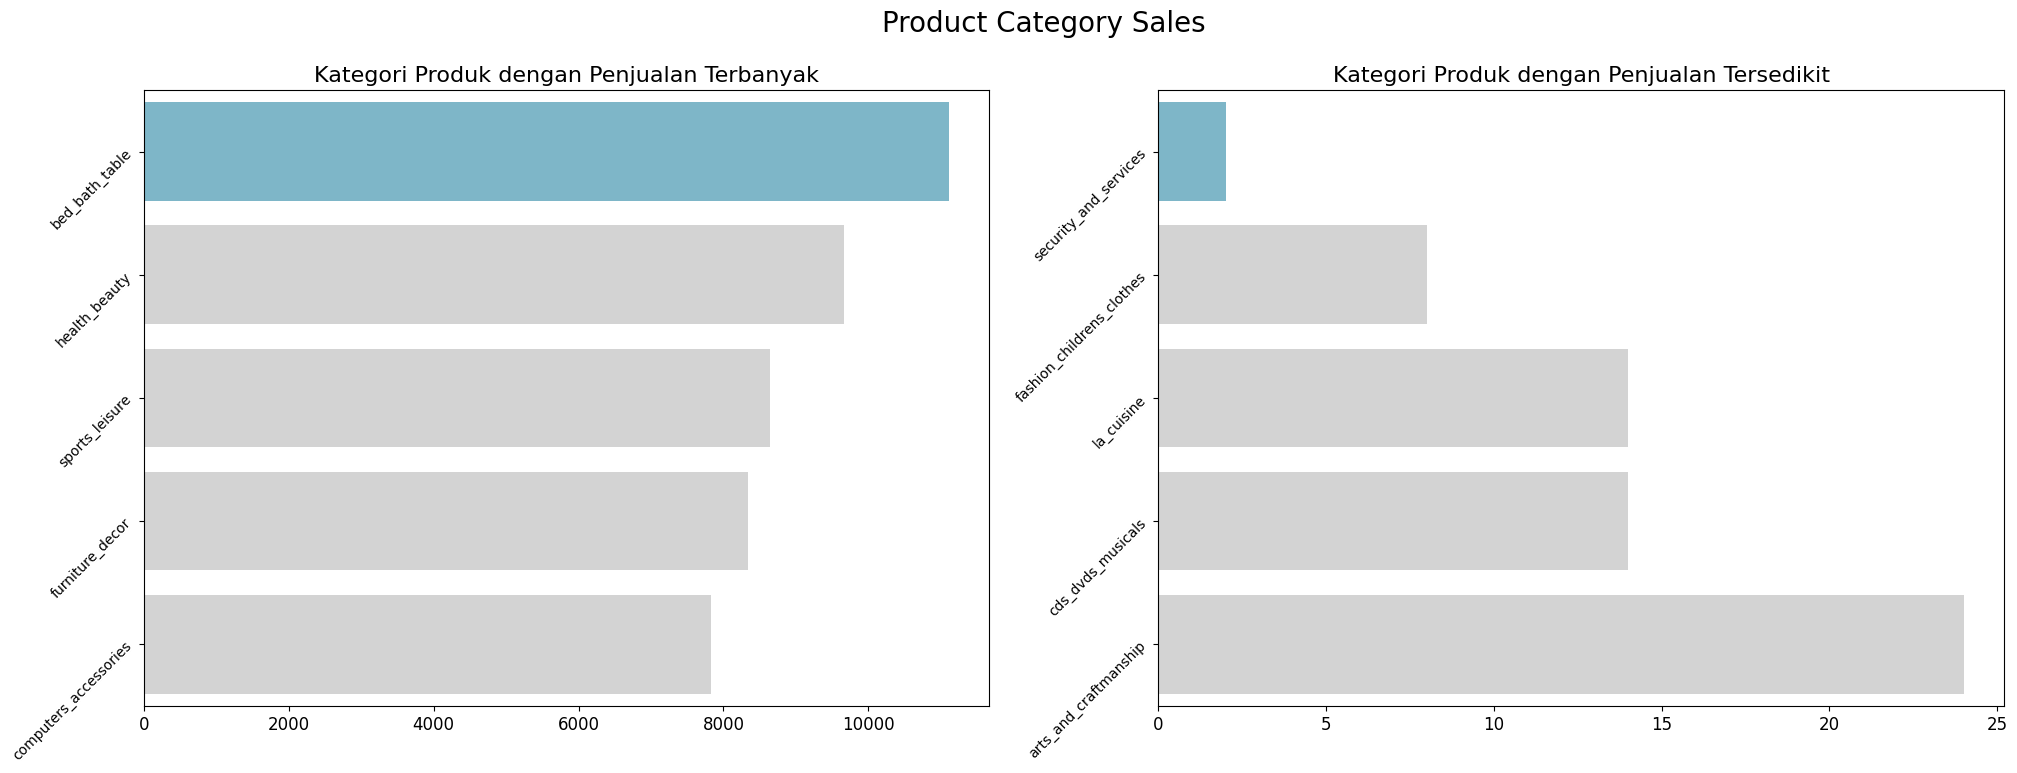

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total_penjualan", y="product_category", data=total_penjualan_per_category_df.head(5), hue="product_category", palette=colors, dodge=False, ax=ax[0])
ax[0].set_title('Kategori Produk dengan Penjualan Terbanyak', fontsize=16)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=12)
for tick in ax[0].get_yticklabels():
    tick.set_rotation(45)

sns.barplot(x="total_penjualan", y="product_category", data=total_penjualan_per_category_df.tail(5).sort_values(by='total_penjualan'), hue="product_category", palette=colors, dodge=False, ax=ax[1])
ax[1].set_title('Kategori Produk dengan Penjualan Tersedikit', fontsize=16)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=12)
for tick in ax[1].get_yticklabels():
    tick.set_rotation(45)

plt.suptitle('Product Category Sales', fontsize=20)
plt.legend([], frameon=False)
plt.show()


### **Kategori Produk Apa yang Paling Banyak dan Paling Sedikit di Beli?**

In [89]:
product_orderItems_category_order_df = pd.merge(product_orderItems_category_df, orders_df, on='order_id', how='inner')

product_orderItems_category_order_df = product_orderItems_category_order_df[['product_id', 'product_category_name_english']]

total_pembelian_per_category_df = product_orderItems_category_order_df.groupby(by='product_category_name_english').size().sort_values(ascending=False).reset_index(name='total_pembelian')
total_pembelian_per_category_df.rename(
    columns={'product_category_name_english':'product_category'},
    inplace=True
)
total_pembelian_per_category_df

,product_category,total_pembelian
0,bed_bath_table,10952
1,health_beauty,9467
2,sports_leisure,8429
3,furniture_decor,8156
4,computers_accessories,7643
...,...,...
66,arts_and_craftmanship,24
67,la_cuisine,14
68,cds_dvds_musicals,14
69,fashion_childrens_clothes,7


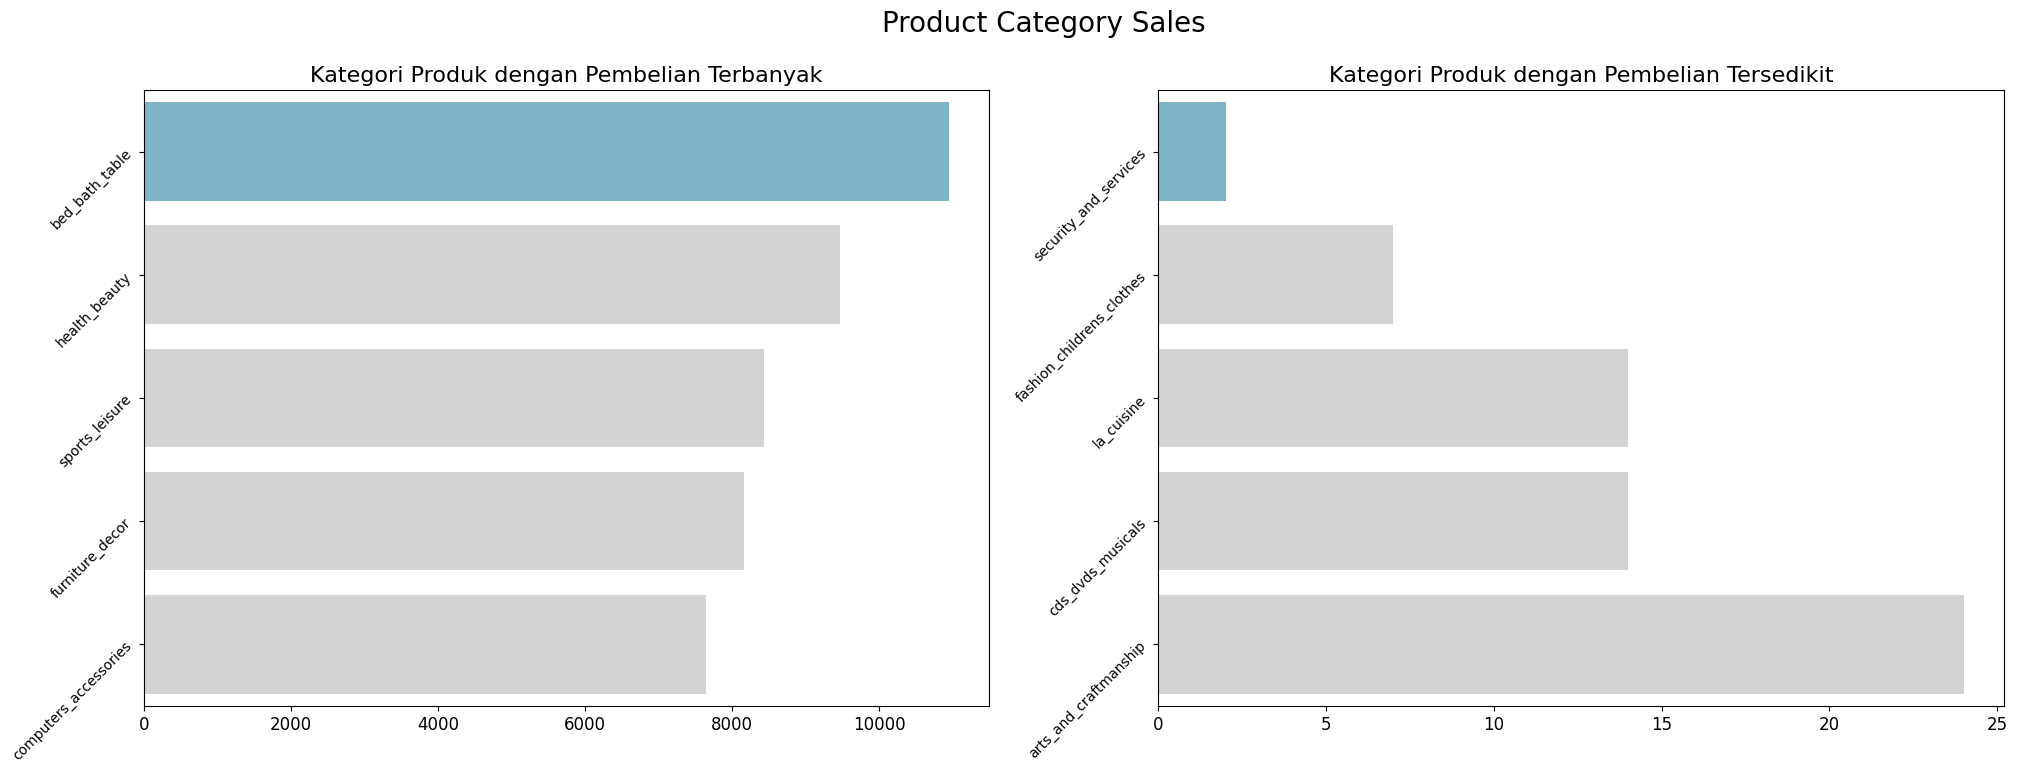

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total_pembelian", y="product_category", data=total_pembelian_per_category_df.head(5), hue="product_category", palette=colors, dodge=False, ax=ax[0])
ax[0].set_title('Kategori Produk dengan Pembelian Terbanyak', fontsize=16)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=12)
for tick in ax[0].get_yticklabels():
    tick.set_rotation(45)

sns.barplot(x="total_pembelian", y="product_category", data=total_pembelian_per_category_df.tail(5).sort_values(by='total_pembelian'), hue="product_category", palette=colors, dodge=False, ax=ax[1])
ax[1].set_title('Kategori Produk dengan Pembelian Tersedikit', fontsize=16)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=12)
for tick in ax[1].get_yticklabels():
    tick.set_rotation(45)

plt.suptitle('Product Category Sales', fontsize=20)
plt.legend([], frameon=False)
plt.show()

### **Bagaimana kesan pelanggan terhadap orderan yang mereka lakukan?**

In [91]:
order_reviews_df = order_reviews_df[['order_id', 'review_score']]

total_review_per_index_df = order_reviews_df['review_score'].value_counts().sort_index().reset_index(name='total_reviews')
total_review_per_index_df.rename(columns={'index':'rating'}, inplace=True)
total_review_per_index_df

,rating,total_reviews
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


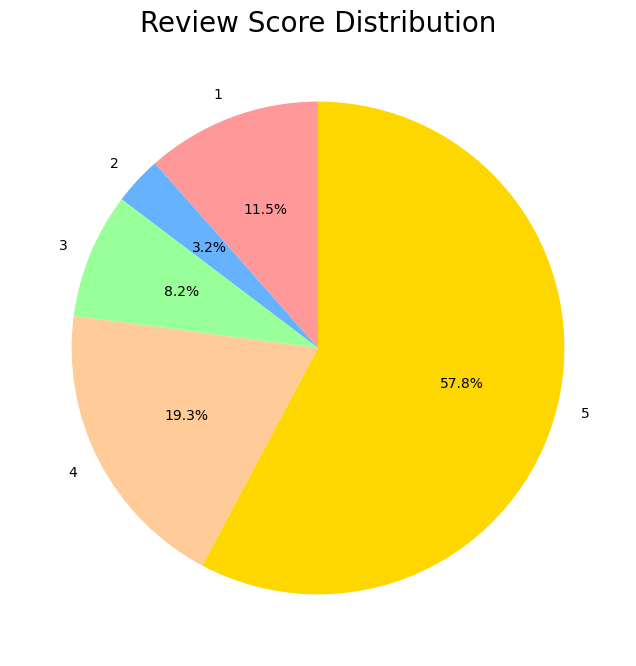

In [92]:
plt.figure(figsize=(10, 8))

plt.pie(
    total_review_per_index_df['total_reviews'],
    labels=total_review_per_index_df['rating'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700']
)

plt.title('Review Score Distribution', fontsize=20)

plt.show()

### **RFM Analysis**

RFM Analysis akan digunakan untuk menjawab beberapa pertanyaan bisnis, yaitu:
1. Kapan terakhir pelanggan melakukan transaksi? (RFM Analysis, **Recency**)
2. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir? (RFM Analysis, **Frequency**)
3. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir? (RFM Analysis, **Monetary**)

In [93]:
order_orderPayment_df = pd.merge(orders_df, order_payments_df, on='order_id', how='outer')

order_orderPayment_df['order_purchase_timestamp'] = pd.to_datetime(order_orderPayment_df['order_purchase_timestamp'])

order_orderPayment_df = order_orderPayment_df[['customer_id', 'order_purchase_timestamp', 'order_id', 'payment_value']]

recent_date = order_orderPayment_df['order_purchase_timestamp'].max()
rfm_df = order_orderPayment_df.groupby(by='customer_id', as_index=False).agg({
    'order_purchase_timestamp': lambda x: (recent_date - x.max()).days,
    'order_id': 'nunique',
    'payment_value': 'sum'
})

rfm_df.rename(columns={
    'order_purchase_timestamp':'recency',
    'order_id':'frequency',
    'payment_value':'monetary'
}, inplace=True)

rfm_df.head()

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74
1,000161a058600d5901f007fab4c27140,409,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35
4,000379cdec625522490c315e70c7a9fb,149,1,107.01


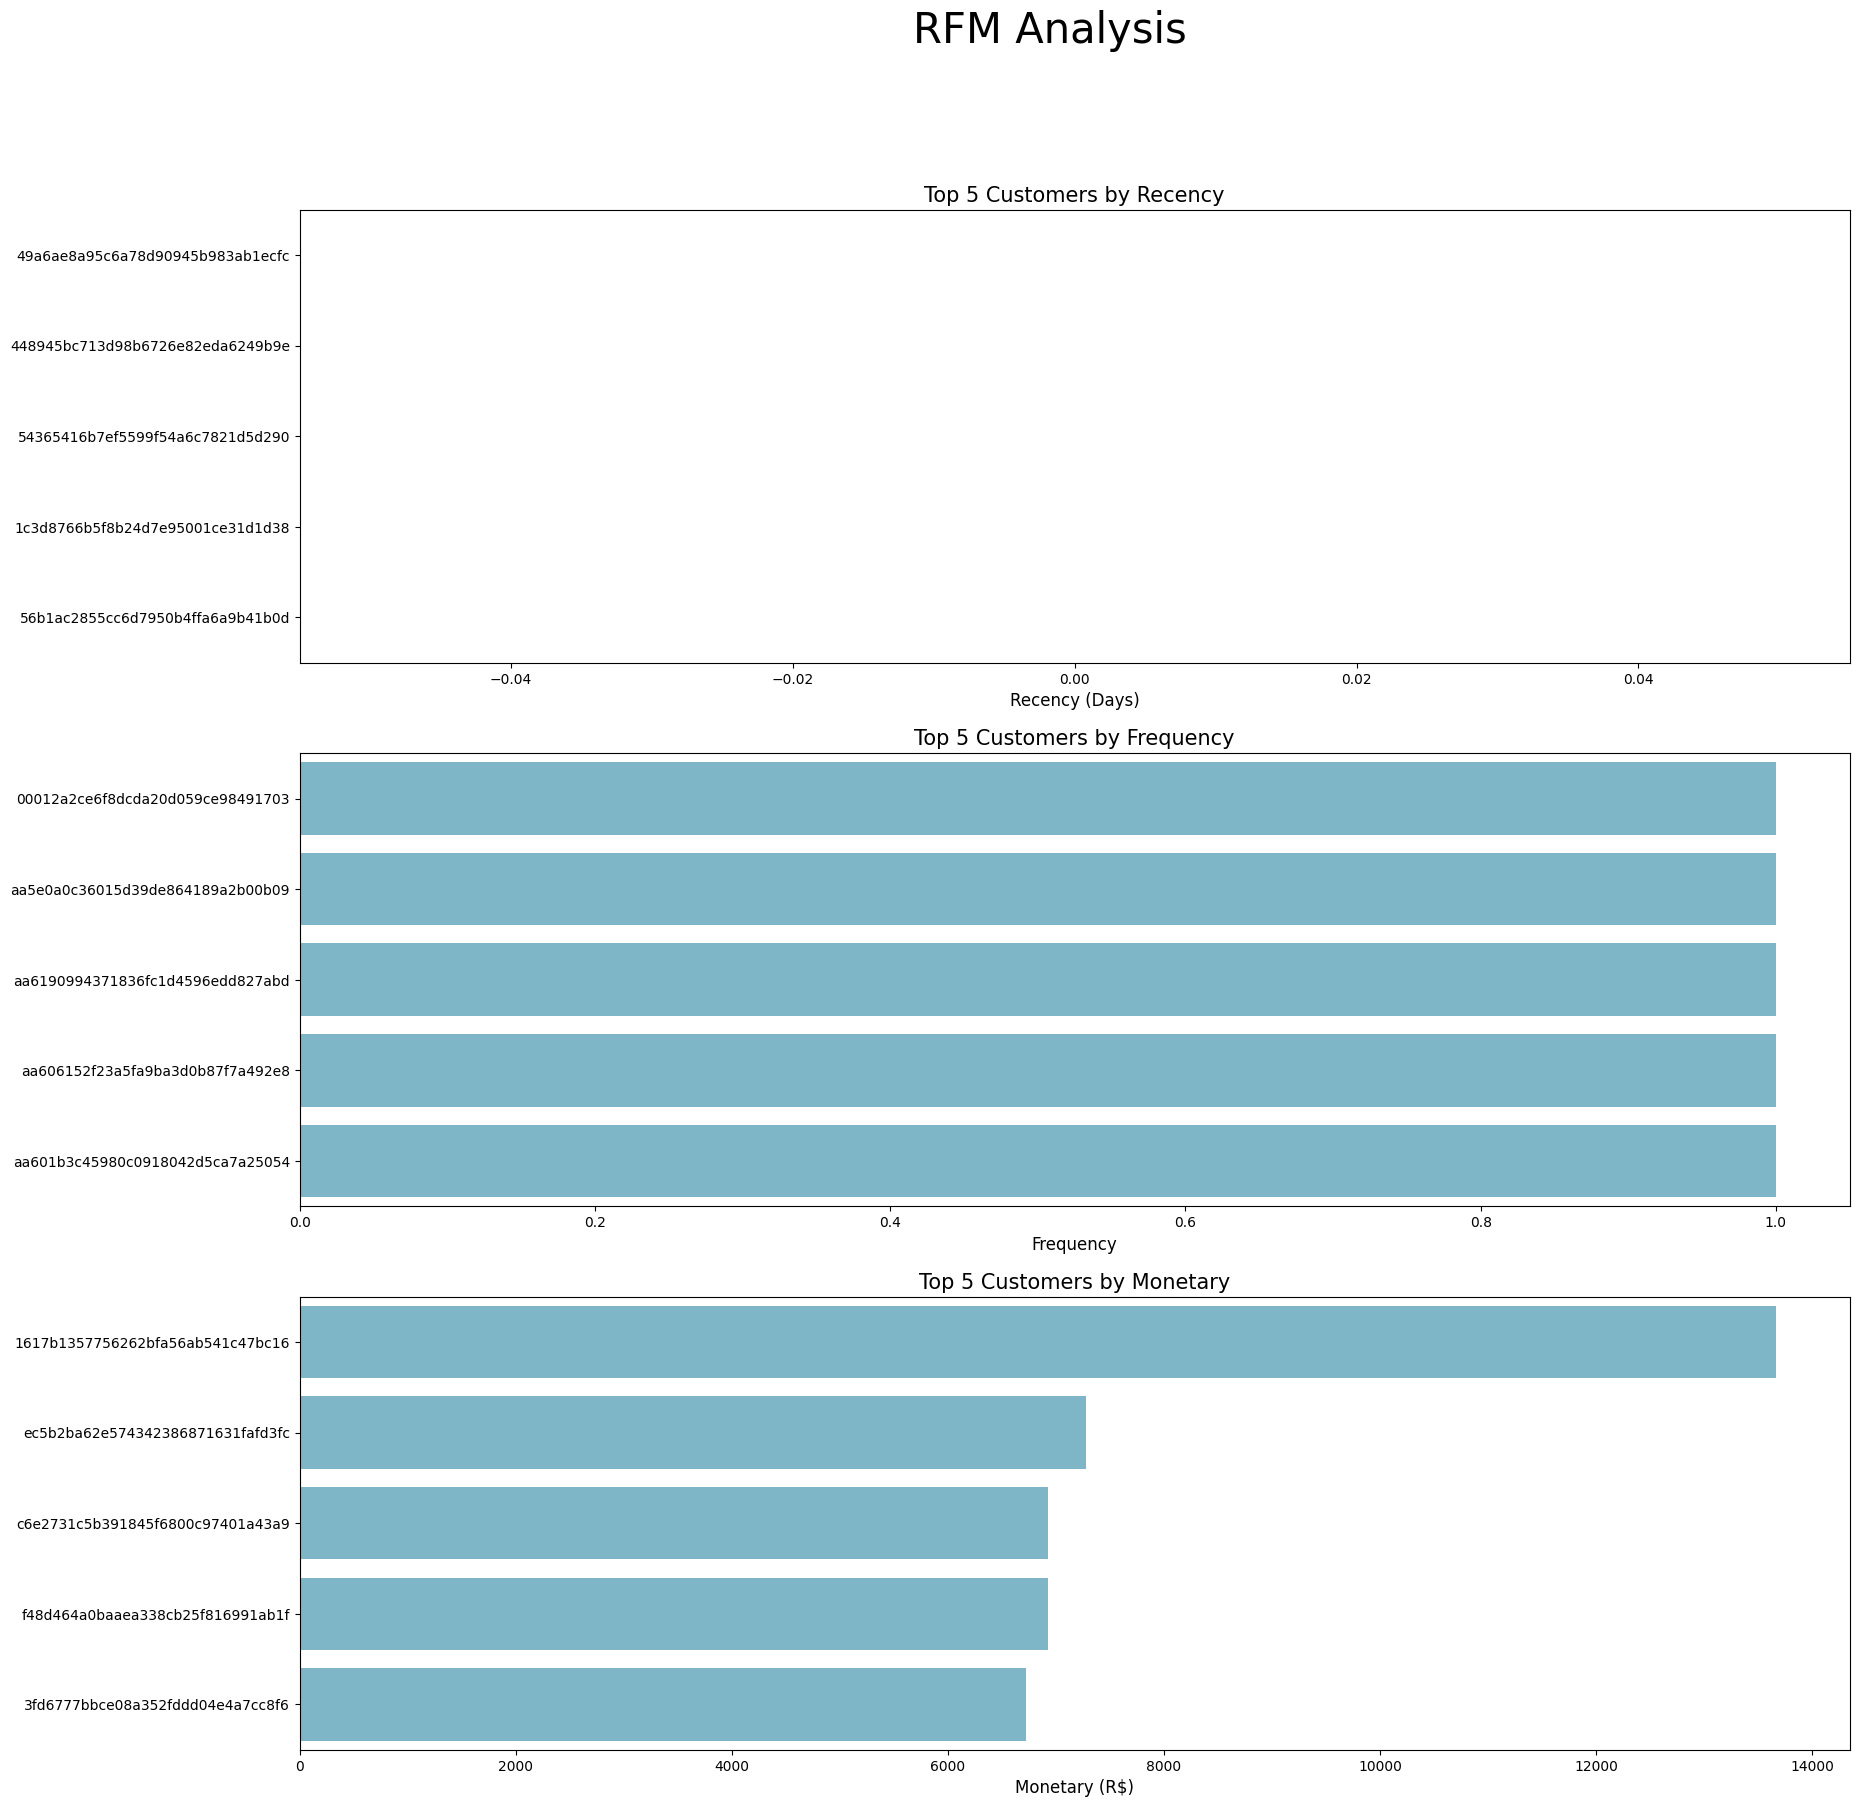

In [94]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(orient='h', data=rfm_df.sort_values(by='recency', ascending=True).head(5), x='recency', y='customer_id', hue='customer_id', palette=colors, dodge=False, ax=ax[0])
ax[0].set_title('Top 5 Customers by Recency', fontsize=15)
ax[0].set_xlabel('Recency (Days)', fontsize=12)
ax[0].set_ylabel(None)

sns.barplot(orient='h', data=rfm_df.sort_values(by='frequency', ascending=False).head(5), x='frequency', y='customer_id', hue='customer_id', palette=colors, dodge=False, ax=ax[1])
ax[1].set_title('Top 5 Customers by Frequency', fontsize=15)
ax[1].set_xlabel('Frequency', fontsize=12)
ax[1].set_ylabel(None)

sns.barplot(orient='h', data=rfm_df.sort_values(by='monetary', ascending=False).head(5), x='monetary', y='customer_id', hue='customer_id', palette=colors, dodge=False, ax=ax[2])
ax[2].set_title('Top 5 Customers by Monetary', fontsize=15)
ax[2].set_xlabel('Monetary (R$)', fontsize=12)
ax[2].set_ylabel(None)

plt.suptitle('RFM Analysis', fontsize=30)
plt.legend([], frameon=False)
plt.show()

## **Conclusion**

* Conclusion pertanyaan 1: 

## **Export Data**

In [95]:
customer_geolocation_df.to_csv('./data/customer_geolocation.csv', index=False)
sellers_geolocation_df.to_csv('./data/sellers_geolocation.csv', index=False)
order_orderItem_orderPayment_df.to_csv('./data/order_orderItem_orderPayment.csv', index=False)
product_orderItems_category_df.to_csv('./data/product_orderItems_category.csv', index=False)
product_orderItems_category_order_df.to_csv('./data/product_orderItems_category_order.csv', index=False)
order_orderPayment_df.to_csv('./data/order_orderPayment.csv', index=False)
rfm_df.to_csv('./data/rfm.csv', index=False)

order_reviews_df.to_csv('./data/order_reviews.csv', index=False)